## Data analyze and visualization of Stackoverflow surveys results to analyse develpoer job satisfaction
In this notebbook results from data preparation phase analyzed developers job satisfactions based on the Stackoverflow surveys.
Each year survey have different focus and questions

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


results_add = "./modified_results/modified_survey_results_public_"

In [2]:
# reading dataframe containing results from all the surveys 
df_all = pd.read_csv(results_add+"all_years.csv.gz",  compression='gzip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In questionier there are questions which are appeared in almost all these consequent 6 years we looked for from 2015 to 2020. These questions are selected and their values checked against each other to eliminate dissimilarities in answers and definitions.

Except column for the **'Year'** representing results of the survey in that particular year, all other columns contain qualitative data.

In [3]:
df_all.head()

,Country,Age_Range,Gender,Salary_Range,Employment_Status,Job_Satisfaction,Formal_Education,UN_subregion,Continent,Year,Company_Size,CareerSatisfaction,Salary,Career_Satisfaction
0,Croatia,25-29,Male,"$20,000 - $40,000",Employed full-time,Moderately satisfied,"Master degree (MA, MS, M.Eng., MBA, etc.)",Southern Europe,Europe,2015,NaN,NaN,NaN,NaN
1,France,20-24,Male,"$20,000 - $40,000",Employed full-time,Neither satisfied nor dissatisfied,"Master degree (MA, MS, M.Eng., MBA, etc.)",Western Europe,Europe,2015,NaN,NaN,NaN,NaN
2,India,20-24,Male,"$80,000 - $100,000",Freelance / Contractor,Moderately satisfied,NaN,Southern Asia,Asia,2015,NaN,NaN,NaN,NaN
3,Latvia,25-29,Male,NaN,Employed full-time,Moderately satisfied,"Bachelor degree (BA, BS, B.Eng., etc.)",Northern Europe,Europe,2015,NaN,NaN,NaN,NaN
4,Norway,30-34,Male,"$60,000 - $80,000",Employed full-time,Extremely satisfied,"Bachelor degree (BA, BS, B.Eng., etc.)",Northern Europe,Europe,2015,NaN,NaN,NaN,NaN


### Part I: Job satisfaction for developers from 2015 to 2020
In this part our aim is to see job satisfaction in years 2015 to 2020

In [4]:
df_temp = df_all[['Year', 'Job_Satisfaction']].copy()
df_temp.shape

(385707, 2)

The unique values in **'Job_Satisfaction'** are qualitative data. we replace them with numeric values to be able to get percentage of satisfaction. We give values between 0 to 9 to each one as follow:<br>


In [5]:
# dropping 'nan' and 'Other' rows from df_temp
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']
df_temp

,Year,Job_Satisfaction
0,2015,Moderately satisfied
1,2015,Neither satisfied nor dissatisfied
2,2015,Moderately satisfied
3,2015,Moderately satisfied
4,2015,Extremely satisfied
...,...,...
385393,2020,Slightly satisfied
385394,2020,Slightly satisfied
385398,2020,Very satisfied
385399,2020,Neither satisfied nor dissatisfied


To check the satisfactin for each year and plot them later first lets change the order of the columns and appearance of satisfaction terms in each year.

In [6]:
df_temp = pd.crosstab(index=[df_temp['Year']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]
#df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)
#pd.crosstab(index=[df['Name'],df['Date']],columns=df['Item'])
df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Year,,,,,,,,,
2015,305,0,0,1565,1775,0,6540,0,5819
2016,14084,0,0,4512,4416,0,16413,0,0
2017,840,0,2523,0,5614,4726,16952,0,9721
2018,2482,0,6318,7057,4966,10012,26005,0,12436
2019,0,4857,0,10752,8720,24207,0,22452,0
2020,0,3746,0,7124,5783,13930,0,14611,0


In [7]:
# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)
df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Year,,,,,,,,,
2015,0.019058,0.000000,0.000000,0.097788,0.110910,0.000000,0.408648,0.000000,0.363597
2016,0.357235,0.000000,0.000000,0.114445,0.112010,0.000000,0.416309,0.000000,0.000000
2017,0.020804,0.000000,0.062488,0.000000,0.139043,0.117050,0.419853,0.000000,0.240762
2018,0.035828,0.000000,0.091200,0.101868,0.071684,0.144523,0.375383,0.000000,0.179514
2019,0.000000,0.068420,0.000000,0.151462,0.122838,0.341001,0.000000,0.316279,0.000000
2020,0.000000,0.082887,0.000000,0.157632,0.127959,0.308227,0.000000,0.323295,0.000000


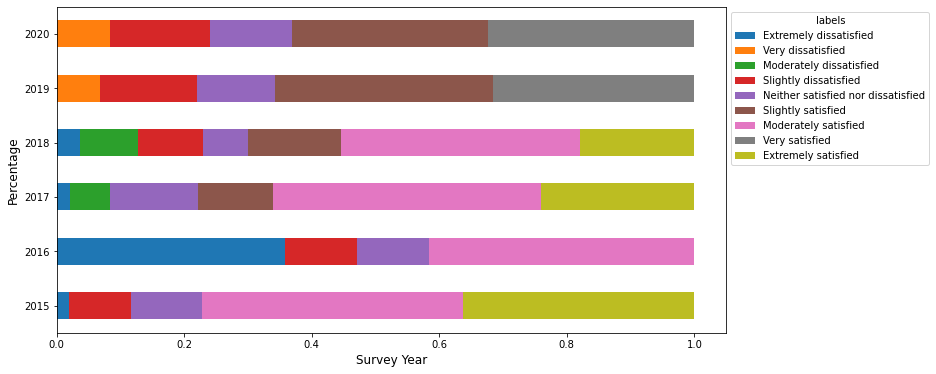

In [8]:
ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6))
ax.set_ylabel('Percentage',fontsize=12)
ax.set_xlabel('Survey Year',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In general most of the participant in this inquery were satisfied from their current job in that year.
As we can see having this amount of categories for satisfaction does not help very much to get insight from data. Maybe changing such categories into less number of classes could help more. For making interpretation easier maybe decreasing them into 3 or 4 classed instead of 8 makes the work easier. Lets change them as below:

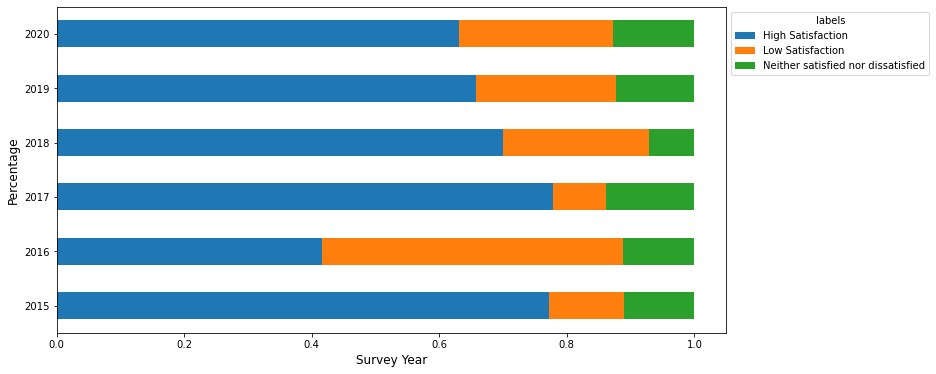

In [9]:
dic_sat ={'Extremely dissatisfied':'Low Satisfaction','Very dissatisfied':'Low Satisfaction',
          'Moderately dissatisfied':'Low Satisfaction','Slightly dissatisfied':'Low Satisfaction',
          'Slightly satisfied':'High Satisfaction' ,'Moderately satisfied':'High Satisfaction' ,
          'Very satisfied':'High Satisfaction' ,'Extremely satisfied':'High Satisfaction' }

df_temp = df_all[['Year', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['Year']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6))
ax.set_ylabel('Percentage',fontsize=12)
ax.set_xlabel('Survey Year',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

This figure shows that satisfaction in general is decreasing from 2015 onward with sharp drop in 2016. It seems 2016 job satisfaction hit the lowest record in IT industry for developers but happily went backed to year 2015 estimation in 2017 altought it declined in next 3 years but still in 2020 it is much better than 2016.

### part  II: Job satisfaction by country and continent
Here we want to analyse developers job satisfaction based on country, continent and UN subregion. Developers that filled in the inqueries during these years are from 226 countries around the glob.Lets first look to the continent and subregion data and see where are the more satisfied developers in the glob.

In [10]:
df_temp = df_all[['Continent', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()
df_temp.Continent.unique()

array(['Europe', 'Asia', 'Americas', 'Oceania', 'Africa'], dtype=object)

In [11]:
df_temp

,Continent,Job_Satisfaction
0,Europe,Moderately satisfied
1,Europe,Neither satisfied nor dissatisfied
2,Asia,Moderately satisfied
3,Europe,Moderately satisfied
4,Europe,Extremely satisfied
...,...,...
385393,Americas,Slightly satisfied
385394,Americas,Slightly satisfied
385398,Americas,Very satisfied
385399,Americas,Neither satisfied nor dissatisfied


In [12]:
df_temp = pd.crosstab(index=[df_temp['Continent']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]

# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Continent,,,,,,,,,
Africa,0.059185,0.049111,0.039037,0.127341,0.141665,0.211239,0.178341,0.111286,0.082796
Americas,0.069218,0.028609,0.030334,0.102806,0.091232,0.176250,0.231011,0.158812,0.111727
Asia,0.056400,0.037894,0.037343,0.124954,0.163876,0.211170,0.194096,0.095451,0.078817
Europe,0.061059,0.028084,0.029363,0.108635,0.102193,0.186123,0.256861,0.127962,0.099719
Oceania,0.063052,0.027113,0.030055,0.106280,0.092339,0.180458,0.248497,0.148612,0.103594


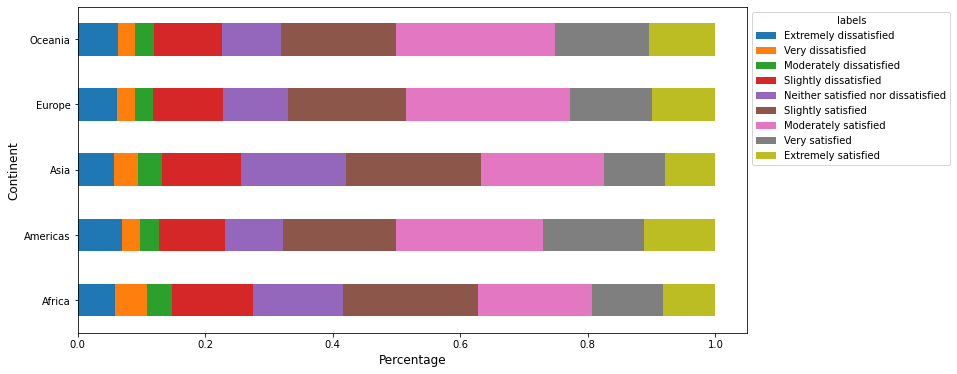

In [13]:
# Plot of above table
ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6))
ax.set_ylabel('Continent',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

The look is interesting, some how exiting. <br> 
The reason is when looking at the figure  we can see the same trend as in Part I happens here again. Amount of satisfaction in each category is very close to each other specially for who are 'Extremly dissatisfied' from their job all around the globe. Lets decrease the number of categories and look to the plot again.

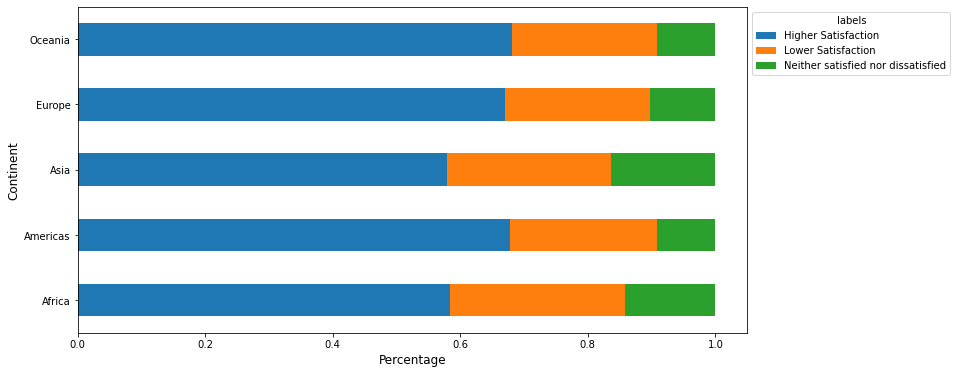

In [14]:
dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

df_temp = df_all[['Continent', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['Continent']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 6))
ax.set_ylabel('Continent',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

Percentage of developers have job satisfaction in Asia and Africa is lower but the reason is not they are dissatisfied as we can see in the figure. Job dissatisfaction is close to what we have in other continets. But the amount of IT people which are in between of these two is higher as we can see from below table.

In [15]:
df_temp

Job_Satisfaction,Higher Satisfaction,Lower Satisfaction,Neither satisfied nor dissatisfied
Continent,,,
Africa,0.583661,0.274673,0.141665
Americas,0.677801,0.230967,0.091232
Asia,0.579533,0.256591,0.163876
Europe,0.670665,0.227141,0.102193
Oceania,0.681161,0.226500,0.092339


### Country and subregion

In [16]:
df_temp = df_all[['UN_subregion', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()

df_temp = pd.crosstab(index=[df_temp['UN_subregion']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]

# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp.sort_values(by=['Extremely satisfied', 'Very satisfied'], inplace=True)
df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
UN_subregion,,,,,,,,,
Central Africa,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000
Polynesia,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000
Middle Africa,0.042373,0.067797,0.033898,0.177966,0.203390,0.177966,0.152542,0.118644,0.025424
Southeastern Europe,0.114286,0.057143,0.000000,0.114286,0.228571,0.228571,0.114286,0.114286,0.028571
Eastern Asia,0.051349,0.037859,0.044169,0.170148,0.176458,0.201697,0.189513,0.075283,0.053525
Western Africa,0.029727,0.053675,0.049546,0.125516,0.165153,0.274979,0.138728,0.105698,0.056978
Northern Africa,0.067839,0.062186,0.042714,0.147613,0.158291,0.211055,0.161432,0.080402,0.068467
Caribbean,0.084948,0.031297,0.062593,0.149031,0.154993,0.180328,0.208644,0.059613,0.068554
South-Eastern Asia,0.050121,0.033646,0.036941,0.122962,0.169962,0.222338,0.206209,0.087409,0.070413


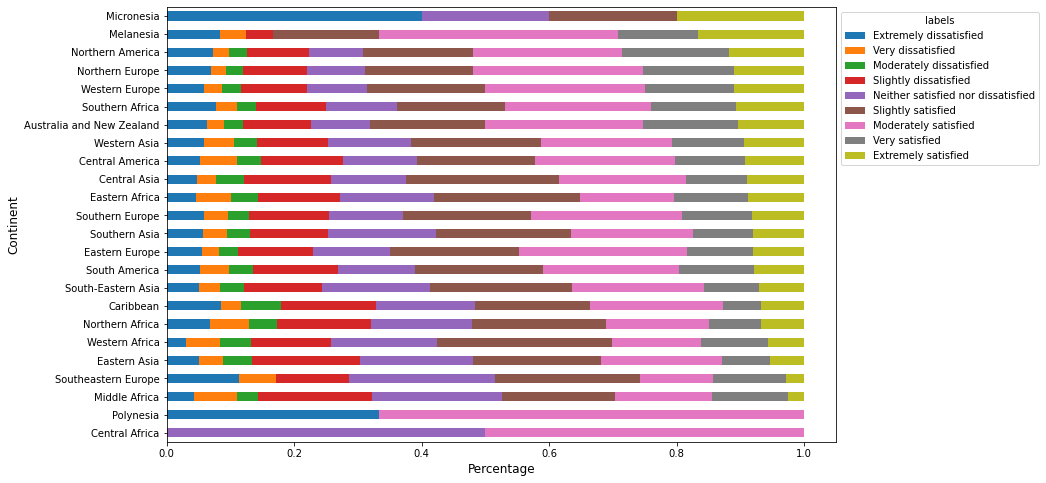

In [17]:
# Plot of above table
ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 8))
ax.set_ylabel('Continent',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

Developers in Ocenia, Northern America and Northern Europe have the most exterme opinions and feeling about their job. They are Extremely satisfied and dissatisfied among developers participated in inqueries.

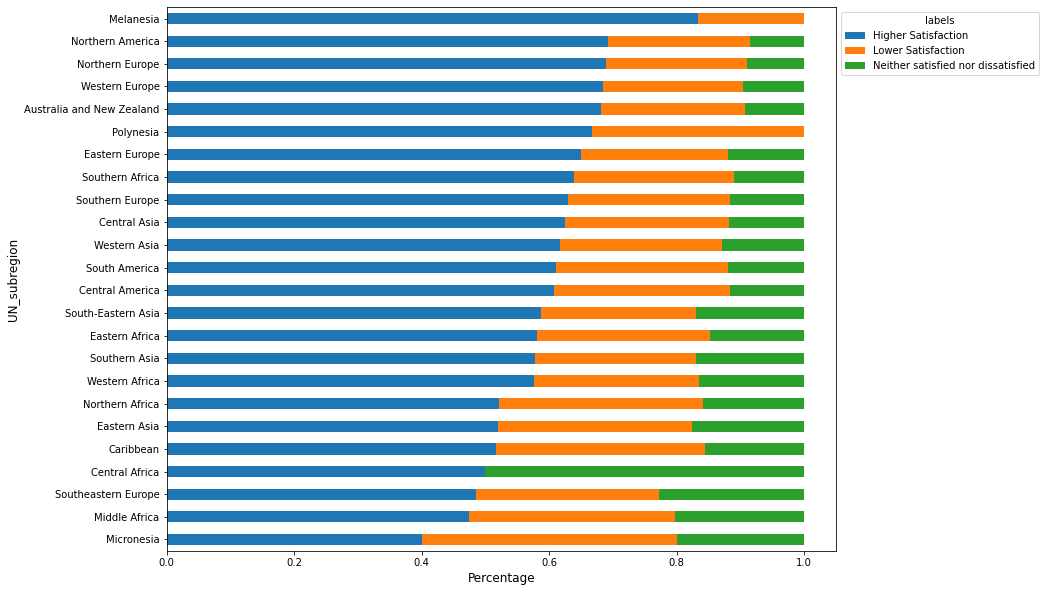

In [18]:
dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

df_temp = df_all[['UN_subregion', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['UN_subregion']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp.sort_values(by=['Higher Satisfaction'], inplace=True)

ax = df_temp.plot(kind='barh', stacked=True, figsize=(12, 10))
ax.set_ylabel('UN_subregion',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

Increasing number of cetagories for job satisfaction, we can observe that above trend appears here. In general Oceinia and Europe developers are more satisfied from their job. lets look to the countries and see what are the top countries with satisfaction.

In [19]:
df_temp = df_all[['Country', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()

df_temp = pd.crosstab(index=[df_temp['Country']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]

# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)


df_temp.sort_values(by=['Extremely satisfied'], inplace=True, ascending=False)
df_temp[:10]

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Country,,,,,,,,,
South Sudan,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
Anguilla,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
Macau,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
Marshall Islands,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
Virgin Islands (U.S.),0.000000,0.0,0.000000,0.0,0.200000,0.200000,0.000000,0.0,0.600000
New Caledonia,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.0,0.500000
Antarctica,0.000000,0.0,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.500000
Puerto Rico,0.055556,0.0,0.000000,0.0,0.055556,0.166667,0.388889,0.0,0.333333
Namibia,0.083333,0.0,0.083333,0.0,0.166667,0.166667,0.250000,0.0,0.250000


In [20]:
dic_sat ={'Extremely dissatisfied':'Lower Satisfaction','Very dissatisfied':'Lower Satisfaction',
          'Moderately dissatisfied':'Lower Satisfaction','Slightly dissatisfied':'Lower Satisfaction',
          'Slightly satisfied':'Higher Satisfaction' ,'Moderately satisfied':'Higher Satisfaction' ,
          'Very satisfied':'Higher Satisfaction' ,'Extremely satisfied':'Higher Satisfaction' }

df_temp = df_all[['Country', 'Job_Satisfaction']].copy()

for key in dic_sat:
    df_temp['Job_Satisfaction'].replace(key, dic_sat[key], inplace=True)

    
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['Job_Satisfaction'] != 'Other']

df_temp = pd.crosstab(index=[df_temp['Country']], columns=df_temp['Job_Satisfaction'])

df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)

df_temp.sort_values(by=['Higher Satisfaction'], inplace=True, ascending=False)

df_temp[:15]

Job_Satisfaction,Higher Satisfaction,Lower Satisfaction,Neither satisfied nor dissatisfied
Country,,,
Solomon Islands,1.0,0.0,0.0
Papua New Guinea,1.0,0.0,0.0
South Georgia and the South Sandwich Islands,1.0,0.0,0.0
Macau,1.0,0.0,0.0
South Sudan,1.0,0.0,0.0
Bouvet Island,1.0,0.0,0.0
Isle of Man,1.0,0.0,0.0
Mali,1.0,0.0,0.0
Bermuda,1.0,0.0,0.0


And obvoiusly developers in islands are the satisfied developers among all the other ones except **'South Sudan'**. One impossibility could be they live and work in calm places which influence their objection on this matter.

### Part III: Gender and Salary influence on job satisfaction.
In data pereparation we assigned the persons participated in surveys into 3 categories: 'Female', 'Male' and 'genderqueer'. In this part we check Gender and Salary influence on the satisfaction.<br> 
In all the survey results during these 6 years just in years of 2016, 2018 and 2020 there is fields of salary or salary range exist. On the other hand the range used in 2016 and 2018 are different and have overlaps, in 2020 they expressed their salary value which could be used to create **'Salary_Range'** column which 2018 format used to do so. 

Lets for begining look to genders job satisfaction in general without considering other values like salary or continent or company size.

In [24]:
df_temp = df_all[['Gender', 'Job_Satisfaction']].copy()
df_temp =df_temp.dropna()


df_temp = pd.crosstab(index=[df_temp['Gender']], columns=df_temp['Job_Satisfaction'])

col_order =['Extremely dissatisfied','Very dissatisfied','Moderately dissatisfied',
            'Slightly dissatisfied','Neither satisfied nor dissatisfied',
            'Slightly satisfied' ,'Moderately satisfied' ,
            'Very satisfied' ,'Extremely satisfied']

df_temp =df_temp[col_order]



# Making these satisfactions as percentage
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0)


df_temp.sort_values(by=['Extremely satisfied'], inplace=True, ascending=False)

df_temp

Job_Satisfaction,Extremely dissatisfied,Very dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Very satisfied,Extremely satisfied
Gender,,,,,,,,,
genderqueer,0.024817,0.009279,0.062221,0.021652,0.148396,0.135520,0.357718,0.030140,0.210258
Other,0.229091,0.000000,0.032727,0.061818,0.072727,0.058182,0.432727,0.000000,0.112727
Prefer not to disclose,0.278182,0.000000,0.000000,0.123636,0.112727,0.000000,0.372727,0.000000,0.112727
Male,0.067612,0.031541,0.027576,0.114697,0.109197,0.190052,0.228856,0.137690,0.092779
Female,0.064536,0.033628,0.027014,0.116462,0.102677,0.192928,0.197935,0.173209,0.091612


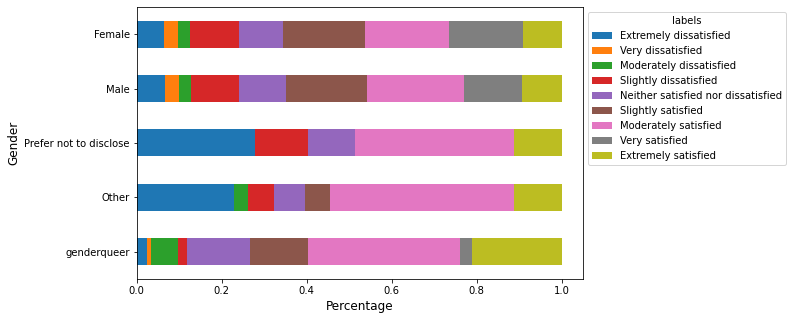

In [27]:
ax = df_temp.plot(kind='barh', stacked=True, figsize=(8, 5))
ax.set_ylabel('Gender',fontsize=12)
ax.set_xlabel('Percentage',fontsize=12)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

By looking into this figure we can see that **'genderqueer'** category have the highest satisfaction and are less dissatisfied from their job as developers or IT person. For 'Male' and 'Female' category the amounts are pretty close to each other in all the levels of dissatisfaction.

In [23]:
df_temp = df_temp.groupby(['Gender', 'Salary_Range']).Job_Satisfaction.count()
df_temp=df_temp.reset_index()
df_temp

KeyError: 'Salary_Range'

In [ ]:
# plot a Stacked Bar Chart using matplotlib
df_temp.plot(
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)
  
#df_total = df["Studied"] + df["Slept"] + df["Other"]
#df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
